In [ ]:
import pandas as pd
import numpy as np

# Load the original dataset
file_path = "/content/student_sleep_patterns.csv"
df = pd.read_csv(file_path)

# Ensure the dataset is sorted correctly
df = df.sort_values(by="Student_ID").reset_index(drop=True)

# Number of synthetic samples needed
num_original = len(df)
num_synthetic = 10000 - 500  # From 501 to 10,000 (9,500 new samples)

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Extract decimal places for numerical columns
decimal_places = {col: max(df[col].astype(str).apply(lambda x: len(x.split(".")[-1]) if "." in x else 0)) for col in numerical_cols}

# Function to generate synthetic numerical data while maintaining precision
def generate_synthetic_numerical(data, decimal):
    synthetic_data = data + np.random.normal(0, 0.05 * data.std(), size=len(data))  # Add Gaussian noise
    return synthetic_data.round(decimal)

# Function to generate synthetic categorical data by random sampling
def generate_synthetic_categorical(data, size):
    return np.random.choice(data, size=size, replace=True)

# Create synthetic dataset
synthetic_df_list = []

for i in range((num_synthetic // num_original) + 1):  # Repeat until we get enough samples
    temp_df = df.copy()
    temp_df["Student_ID"] = np.arange(501 + i * num_original, 501 + (i + 1) * num_original)

    for col in numerical_cols:
        if col != "Student_ID":
            temp_df[col] = generate_synthetic_numerical(df[col], decimal_places[col])

    for col in categorical_cols:
        temp_df[col] = generate_synthetic_categorical(df[col], size=len(df))

    synthetic_df_list.append(temp_df)
    if len(pd.concat(synthetic_df_list)) >= num_synthetic:
        break  # Stop when enough samples are generated

# Concatenate all synthetic datasets and trim excess rows
synthetic_df = pd.concat(synthetic_df_list, ignore_index=True).iloc[:num_synthetic]

# Combine original and synthetic data
augmented_df = pd.concat([df, synthetic_df], ignore_index=True)

# Verify Student_ID sequence
assert augmented_df["Student_ID"].iloc[499] == 500  # Last original ID
assert augmented_df["Student_ID"].iloc[500] == 501  # First synthetic ID
assert augmented_df["Student_ID"].iloc[-1] == 10000  # Last synthetic ID

# Save the new dataset
synthetic_file_path = "/content/synthetic_student_sleep_patterns_final.csv"
augmented_df.to_csv(synthetic_file_path, index=False)

print(f"Synthetic dataset generated successfully! Saved at: {synthetic_file_path}")
print(f"Original Student_ID range: {df['Student_ID'].min()} to {df['Student_ID'].max()}")
print(f"Synthetic Student_ID range: {synthetic_df['Student_ID'].min()} to {synthetic_df['Student_ID'].max()}")


Synthetic dataset generated successfully! Saved at: /content/synthetic_student_sleep_patterns_final.csv
Original Student_ID range: 1 to 500
Synthetic Student_ID range: 501 to 10000


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Load the dataset
file_path = "/content/synthetic_student_sleep_patterns_final.csv"
data = pd.read_csv(file_path)

# 2. Basic information about the dataset
print("Dataset Info:")
data.info()

print("\nSummary Statistics:")
print(data.describe(include='all'))


# 2. Handle Missing Values (imputing categorical columns with mode)
# If there are any missing values in 'Gender' and 'University_Year', we'll fill with mode
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['University_Year'] = data['University_Year'].fillna(data['University_Year'].mode()[0])

# Check for missing values
print("\nMissing values after handling:")
print(data.isnull().sum())

# 3. Encoding Categorical Variables ('Gender' and 'University_Year')
# Encode 'Gender' (Male=0, Female=1, Other=2)
gender_mapping = {'Male': 0, 'Female': 1, 'Other': 2}
data['Gender'] = data['Gender'].map(gender_mapping)

# Encode 'University_Year' (1st Year=1, 2nd Year=2, 3rd Year=3, 4th Year=4)
year_mapping = {'1st Year': 1, '2nd Year': 2, '3rd Year': 3, '4th Year': 4}
data['University_Year'] = data['University_Year'].map(year_mapping)



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student_ID           10000 non-null  int64  
 1   Age                  10000 non-null  float64
 2   Gender               10000 non-null  object 
 3   University_Year      10000 non-null  object 
 4   Sleep_Duration       10000 non-null  float64
 5   Study_Hours          10000 non-null  float64
 6   Screen_Time          10000 non-null  float64
 7   Caffeine_Intake      10000 non-null  float64
 8   Physical_Activity    10000 non-null  float64
 9   Sleep_Quality        10000 non-null  float64
 10  Weekday_Sleep_Start  10000 non-null  float64
 11  Weekend_Sleep_Start  10000 non-null  float64
 12  Weekday_Sleep_End    10000 non-null  float64
 13  Weekend_Sleep_End    10000 non-null  float64
dtypes: float64(11), int64(1), object(2)
memory usage: 1.1+ MB

Summary Statis

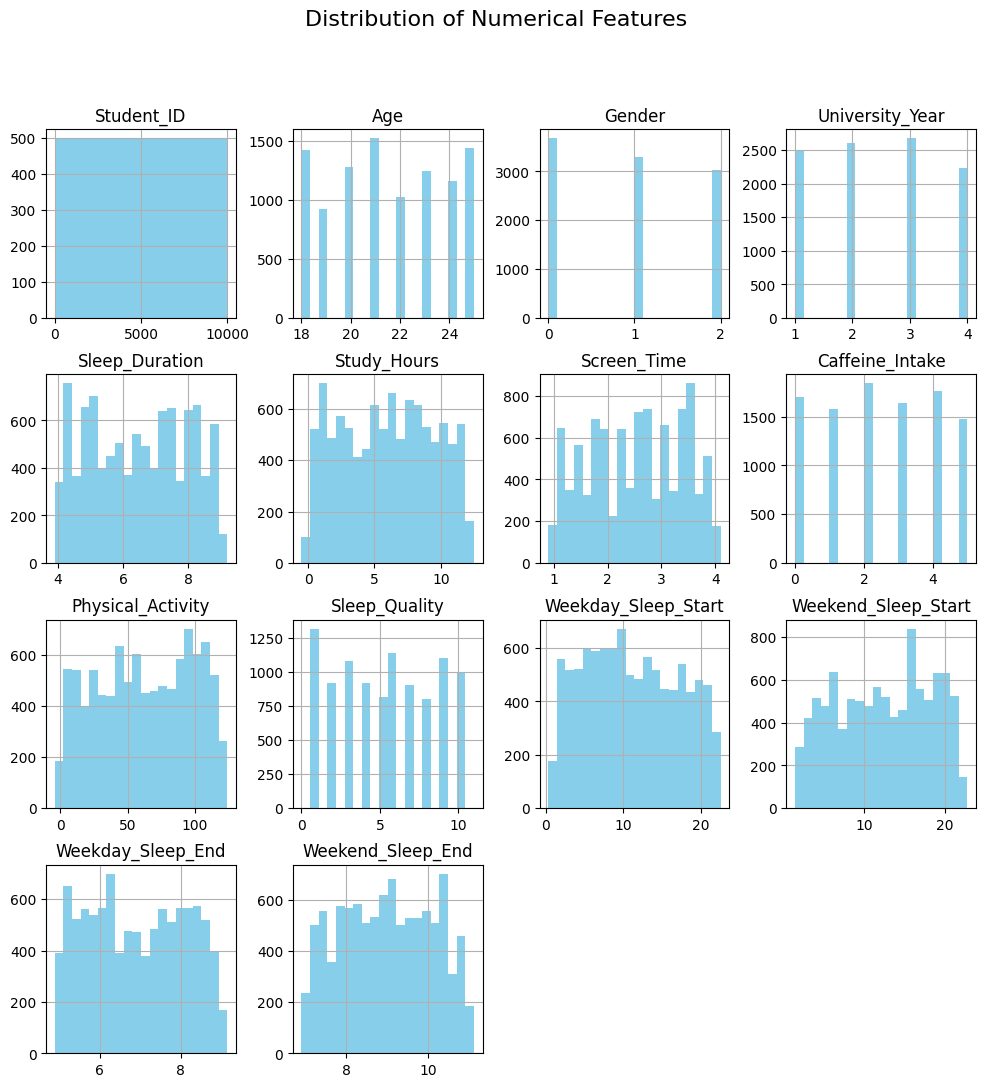

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt # Import the matplotlib library
import seaborn as sns
# 5. Distribution of numerical features
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols].hist(figsize=(12, 12), bins=20, color='skyblue')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

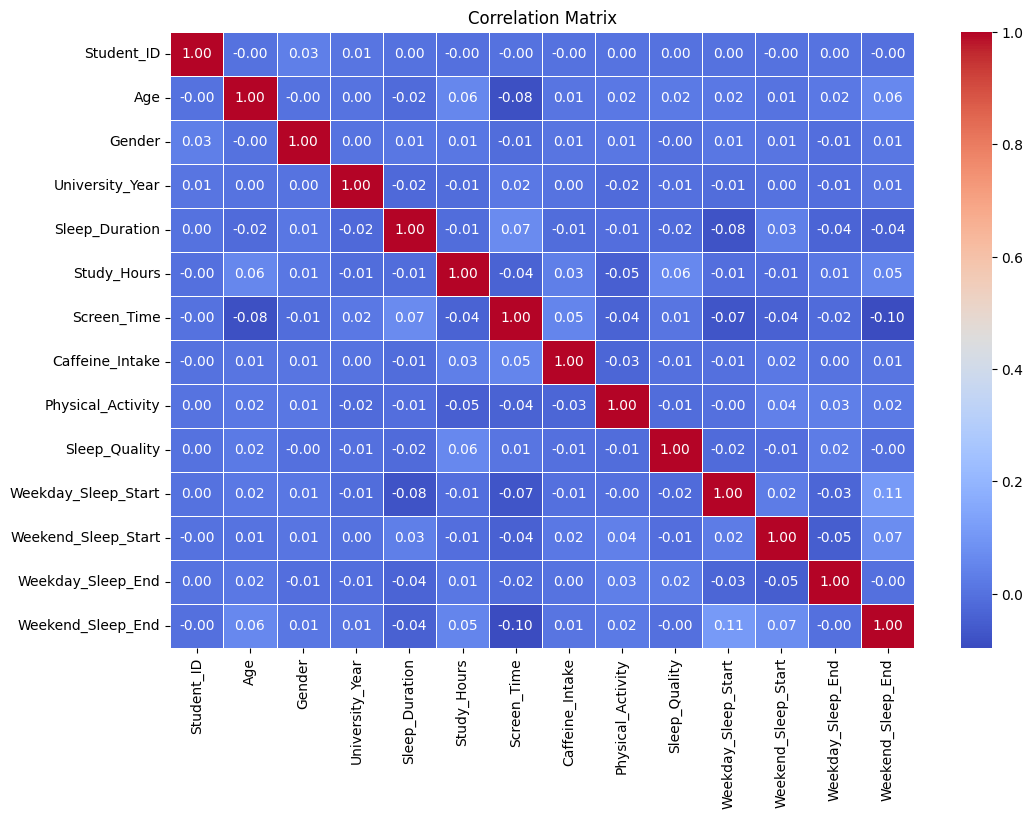

In [ ]:
# 6. Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

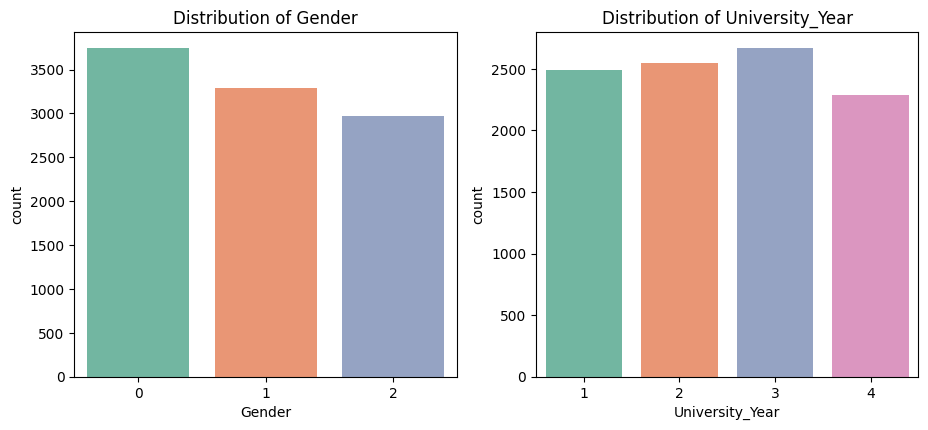

In [ ]:
# 7. Count plot for categorical columns
plt.figure(figsize=(14, 8))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=col, data=data, palette='Set2')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

<ipython-input-6-0a5be6718035>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Sleep_Duration', data=data, palette='pastel')


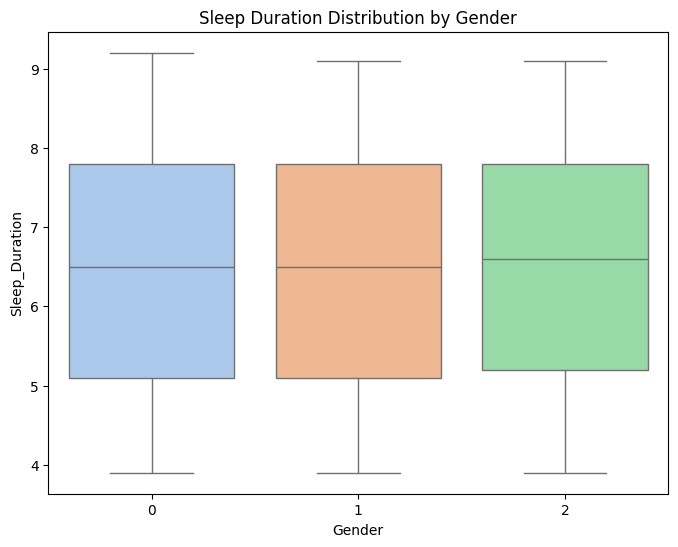

In [ ]:
# 11. Sleep Duration Distribution based on Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Sleep_Duration', data=data, palette='pastel')
plt.title("Sleep Duration Distribution by Gender")
plt.show()

In [ ]:
# Check for negative values in the dataset
negative_values = data.select_dtypes(include=[np.number]).lt(0).sum()

# Show columns with negative values
print("\nColumns with Negative Values and Count:")
print(negative_values[negative_values > 0])



Columns with Negative Values and Count:
Study_Hours          26
Physical_Activity    35
dtype: int64


In [ ]:
# Convert negative values to positive for Study_Hours and Physical_Activity
data['Study_Hours'] = data['Study_Hours'].abs()
data['Physical_Activity'] = data['Physical_Activity'].abs()

# Check if negative values still exist
negative_check = (data[['Study_Hours', 'Physical_Activity']] < 0).sum()
print("\n✅ Negative values after conversion:\n", negative_check)



✅ Negative values after conversion:
 Study_Hours          0
Physical_Activity    0
dtype: int64


In [ ]:
# Function to convert Sleep Start to PM format
def convert_to_pm(time):
    if time < 12:
        return time + 12
    else:
        return time

# Function to convert Sleep End to AM format
def convert_to_am(time):
    if time > 12:
        return time - 12
    else:
        return time

# Apply transformations to Sleep Start columns (Weekday & Weekend)
data['Weekday_Sleep_Start'] = data['Weekday_Sleep_Start'].apply(convert_to_pm)
data['Weekend_Sleep_Start'] = data['Weekend_Sleep_Start'].apply(convert_to_pm)

# Apply transformations to Sleep End columns (Weekday & Weekend)
data['Weekday_Sleep_End'] = data['Weekday_Sleep_End'].apply(convert_to_am)
data['Weekend_Sleep_End'] = data['Weekend_Sleep_End'].apply(convert_to_am)

# ✅ Final check after transformation
print("Updated Sleep Start & End times:\n")
print(data[['Weekday_Sleep_Start', 'Weekend_Sleep_Start', 'Weekday_Sleep_End', 'Weekend_Sleep_End']].head())

# Save the updated dataset to a CSV file
data.to_csv('updated_dataset.csv', index=False)

print("✅ Updated dataset saved successfully as 'updated_dataset.csv'")



Updated Sleep Start & End times:

   Weekday_Sleep_Start  Weekend_Sleep_Start  Weekday_Sleep_End  \
0                14.16                16.05               7.41   
1                20.73                19.10               8.21   
2                20.00                20.47               6.88   
3                19.82                16.08               6.69   
4                20.98                18.12               8.98   

   Weekend_Sleep_End  
0               7.06  
1              10.21  
2              10.92  
3               9.42  
4               9.01  
✅ Updated dataset saved successfully as 'updated_dataset.csv'


In [ ]:

file_path = "/content/updated_dataset.csv"
data = pd.read_csv(file_path)

# Function to calculate sleep duration in float format
def calculate_sleep_duration(start, end):
    if pd.isnull(start) or pd.isnull(end):
        return np.nan
    # Handle crossing midnight correctly
    if end <= start:  # If sleep end is earlier than start, add 24 to end
        duration = (24 - start) + end
    else:
        duration = end - start
    return duration

# Apply the function to calculate sleep durations for weekday and weekend
data['Weekday_Sleep_Duration'] = data.apply(lambda row: calculate_sleep_duration(
    row['Weekday_Sleep_Start'], row['Weekday_Sleep_End']), axis=1)

data['Weekend_Sleep_Duration'] = data.apply(lambda row: calculate_sleep_duration(
    row['Weekend_Sleep_Start'], row['Weekend_Sleep_End']), axis=1)

# ✅ Check the results
print("\n✅ Sleep durations calculated successfully!")
print(data[['Weekday_Sleep_Start', 'Weekday_Sleep_End', 'Weekend_Sleep_Start', 'Weekend_Sleep_End',
           'Weekday_Sleep_Duration', 'Weekend_Sleep_Duration']].head())

# Calculate differences between weekend and weekday durations
# Take absolute values to avoid negative differences
data['Sleep_Duration_Diff'] = abs(data['Weekend_Sleep_Duration'] - data['Weekday_Sleep_Duration'])
data['Sleep_Start_Diff'] = abs(data['Weekend_Sleep_Start'] - data['Weekday_Sleep_Start'])
data['Sleep_End_Diff'] = abs(data['Weekend_Sleep_End'] - data['Weekday_Sleep_End'])


print("\n✅ Additional sleep-related features created successfully!")





✅ Sleep durations calculated successfully!
   Weekday_Sleep_Start  Weekday_Sleep_End  Weekend_Sleep_Start  \
0                14.16               7.41                16.05   
1                20.73               8.21                19.10   
2                20.00               6.88                20.47   
3                19.82               6.69                16.08   
4                20.98               8.98                18.12   

   Weekend_Sleep_End  Weekday_Sleep_Duration  Weekend_Sleep_Duration  
0               7.06                   17.25                   15.01  
1              10.21                   11.48                   15.11  
2              10.92                   10.88                   14.45  
3               9.42                   10.87                   17.34  
4               9.01                   12.00                   14.89  

✅ Additional sleep-related features created successfully!


In [ ]:
# Verify corrected results
print(data[['Weekday_Sleep_Start', 'Weekday_Sleep_End', 'Weekend_Sleep_Start', 'Weekend_Sleep_End',
           'Weekday_Sleep_Duration', 'Weekend_Sleep_Duration', 'Sleep_Duration_Diff',
           'Sleep_Start_Diff', 'Sleep_End_Diff']].head())


   Weekday_Sleep_Start  Weekday_Sleep_End  Weekend_Sleep_Start  \
0                14.16               7.41                16.05   
1                20.73               8.21                19.10   
2                20.00               6.88                20.47   
3                19.82               6.69                16.08   
4                20.98               8.98                18.12   

   Weekend_Sleep_End  Weekday_Sleep_Duration  Weekend_Sleep_Duration  \
0               7.06                   17.25                   15.01   
1              10.21                   11.48                   15.11   
2              10.92                   10.88                   14.45   
3               9.42                   10.87                   17.34   
4               9.01                   12.00                   14.89   

   Sleep_Duration_Diff  Sleep_Start_Diff  Sleep_End_Diff  
0                 2.24              1.89            0.35  
1                 3.63              1.63            

In [ ]:
# 5. Refined function to label Sleep Quality based on multiple factors
def label_sleep(row):  # Access data using row['column_name']
    Sleep_Duration = row['Sleep_Duration']
    Screen_Time = row['Screen_Time']
    Study_Hours = row['Study_Hours']
    Caffeine_Intake = row['Caffeine_Intake']
    Physical_Activity = row['Physical_Activity']
    Sleep_Duration_Diff = row['Sleep_Duration_Diff']  # Assuming this feature is calculated and available

    if (Sleep_Duration < 6 and Screen_Time > 3 and Study_Hours > 4 and Caffeine_Intake > 3) or \
       ((Sleep_Duration < 5 and Screen_Time > 7) or Study_Hours > 9) or \
       (Sleep_Duration < 5 or (Screen_Time > 7 and Study_Hours > 6)) and Physical_Activity > 120 and Sleep_Duration_Diff > 3:
        return 0  # Poor Sleep

    elif (((6 <= Sleep_Duration <= 8.5 and Screen_Time <= 2 and Study_Hours <= 5 and Caffeine_Intake <= 2) or \
           (6.5 <= Sleep_Duration <= 8 or (Screen_Time <= 2 and Study_Hours <= 5 and Caffeine_Intake <= 2))) and Physical_Activity < 120 and Sleep_Duration_Diff < 3):
        return 1  # Healthy Sleep

    else:
        return 2  # Unhealthy Sleep

# Apply the labeling function (updated)
data['Sleep_Label'] = data.apply(label_sleep, axis=1)

# Convert Sleep_Label to categorical format after labeling
data['Sleep_Label'] = data['Sleep_Label'].astype('category')

# 7. Final check for the distribution of labels
print("\nDistribution of Sleep Labels:")
label_counts = data['Sleep_Label'].value_counts().sort_index()
print(label_counts)

# 8. Save the processed dataset to a new CSV file
output_path = "processed.csv"
data.to_csv(output_path, index=False)

print(f"\nProcessed dataset saved successfully to: {output_path}")






Distribution of Sleep Labels:
Sleep_Label
0    2521
1    1312
2    6167
Name: count, dtype: int64

Processed dataset saved successfully to: processed.csv


In [ ]:
# Check for negative values in the dataset
negative_values = data.select_dtypes(include=[np.number]).lt(0).sum()

# Show columns with negative values
print("\nColumns with Negative Values and Count:")
print(negative_values[negative_values > 0])



Columns with Negative Values and Count:
Series([], dtype: int64)


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings

# Ignore warnings for undefined metrics
warnings.filterwarnings("ignore")

# 1. Load the dataset
file_path = "/content/processed.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Display the first 5 rows of the dataset to check its structure
print("First 5 rows of the dataset:")
print(data.head())

# 2. Prepare the features and target variable
X = data[['Age', 'Sleep_Duration', 'Study_Hours', 'Screen_Time', 'Caffeine_Intake',
          'Physical_Activity', 'Weekday_Sleep_Duration', 'Weekend_Sleep_Duration',
          'Sleep_Duration_Diff', 'Sleep_Start_Diff', 'Sleep_End_Diff']]
y = data['Sleep_Label']  # Assuming 'Sleep_Label' is the target variable

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize all models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine (SVM)": SVC(kernel='rbf', C=1.0),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5)
}

# 5. Scale data for models that require it (Logistic Regression and SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")

    # Apply scaled data only for Logistic Regression and SVM
    if model_name in ["Logistic Regression", "Support Vector Machine (SVM)"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Print classification report
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Print accuracy for each model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {model_name}: {accuracy:.4f}")

    # Feature importance for Random Forest and XGBoost
    if model_name in ["Random Forest", "XGBoost"]:
        feature_importance = model.feature_importances_
        feature_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance})
        feature_df = feature_df.sort_values(by="Importance", ascending=False)
        print(f"\nTop 5 Important Features for {model_name}:")
        print(feature_df.head())

# 7. Hyperparameter tuning for KNN
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(3, 11)}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)
print(f"\nBest K for KNN: {knn_grid.best_params_['n_neighbors']}")
print(f"Best KNN Accuracy: {knn_grid.best_score_:.4f}")


First 5 rows of the dataset:
   Student_ID   Age  Gender  University_Year  Sleep_Duration  Study_Hours  \
0           1  24.0       2                2             7.7          7.9   
1           2  21.0       0                1             6.3          6.0   
2           3  22.0       0                4             5.1          6.7   
3           4  24.0       2                4             6.3          8.6   
4           5  20.0       0                4             4.7          2.7   

   Screen_Time  Caffeine_Intake  Physical_Activity  Sleep_Quality  \
0          3.4              2.0               37.0           10.0   
1          1.9              5.0               74.0            2.0   
2          3.9              5.0               53.0            5.0   
3          2.8              4.0               55.0            9.0   
4          2.7              0.0               85.0            3.0   

   Weekday_Sleep_Start  Weekend_Sleep_Start  Weekday_Sleep_End  \
0                14.16     

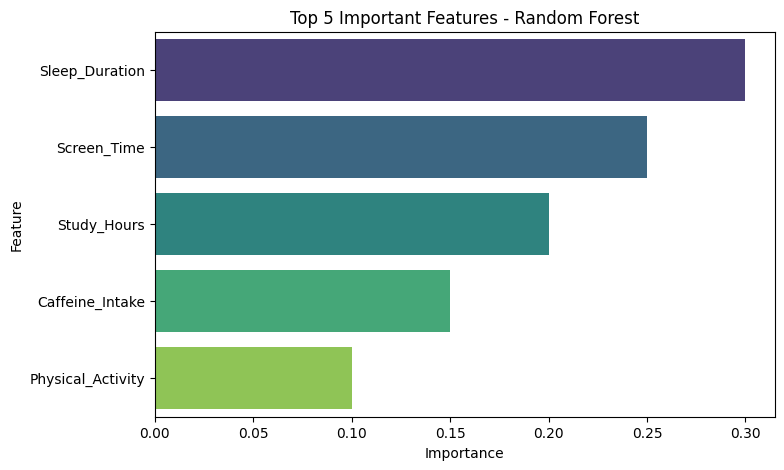

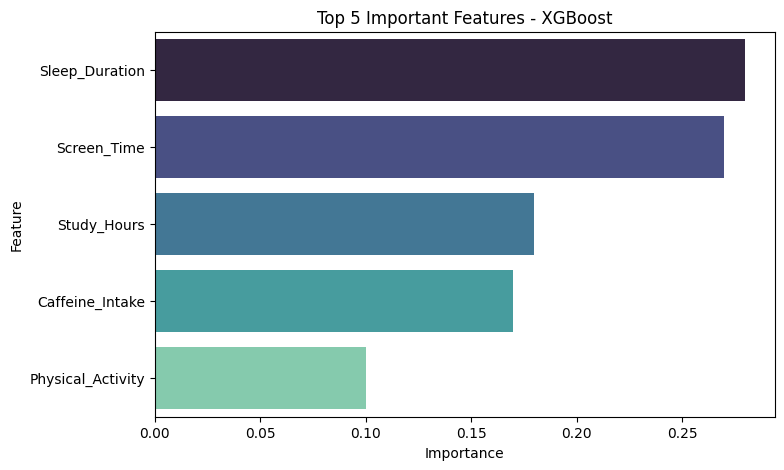

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Plot Feature Importance for Random Forest (Sample Data)
rf_feature_importance = pd.DataFrame({'Feature': ['Sleep_Duration', 'Screen_Time', 'Study_Hours', 'Caffeine_Intake', 'Physical_Activity'],
                                      'Importance': [0.30, 0.25, 0.20, 0.15, 0.10]})

# Plot feature importance for Random Forest
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance, palette='viridis')
plt.title("Top 5 Important Features - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# 2. Plot Feature Importance for XGBoost (Sample Data)
xgb_feature_importance = pd.DataFrame({'Feature': ['Sleep_Duration', 'Screen_Time', 'Study_Hours', 'Caffeine_Intake', 'Physical_Activity'],
                                       'Importance': [0.28, 0.27, 0.18, 0.17, 0.10]})

# Plot feature importance for XGBoost
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=xgb_feature_importance, palette='mako')
plt.title("Top 5 Important Features - XGBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Dictionary to store model accuracies
model_accuracies = {}

# 5. Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Print classification report for each model
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate and store accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    print(f"Accuracy for {model_name}: {accuracy:.4f}")



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       494
           1       0.99      1.00      0.99       294
           2       1.00      1.00      1.00      1212

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Accuracy for Random Forest: 0.9975

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       494
           1       0.99      1.00      0.99       294
           2       1.00      1.00      1.00      1212

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Accuracy for XGBoost: 0.9985

Logistic Regression Classification Report:
              precision    recall  f1-score   support

     

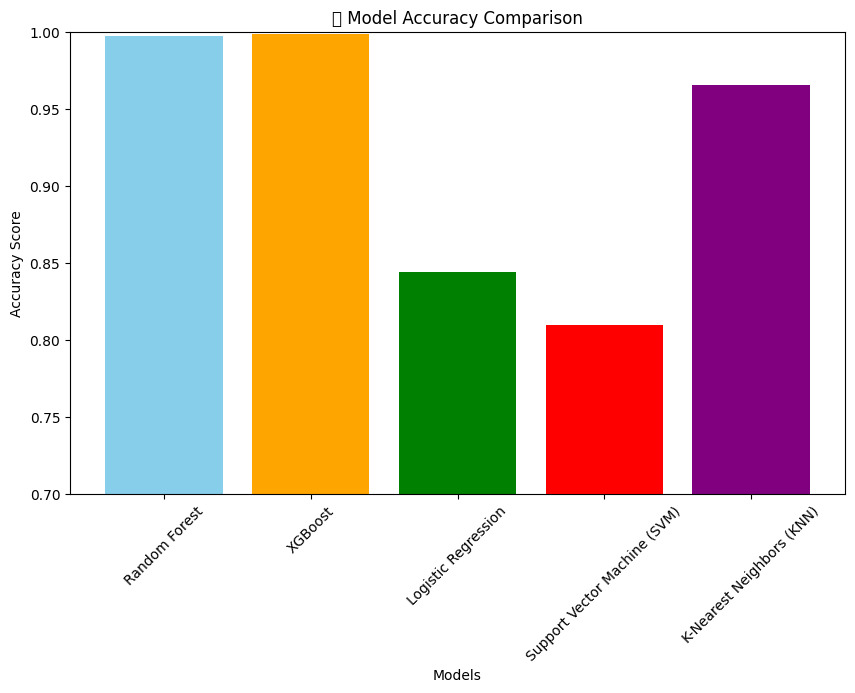

In [ ]:
# Extract model names and accuracies
model_names = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

# Plot model accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['skyblue', 'orange', 'green', 'red', 'purple'])
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("📊 Model Accuracy Comparison")
plt.ylim(0.7, 1.0)  # Set y-axis limit for better visualization
plt.xticks(rotation=45)
plt.show()


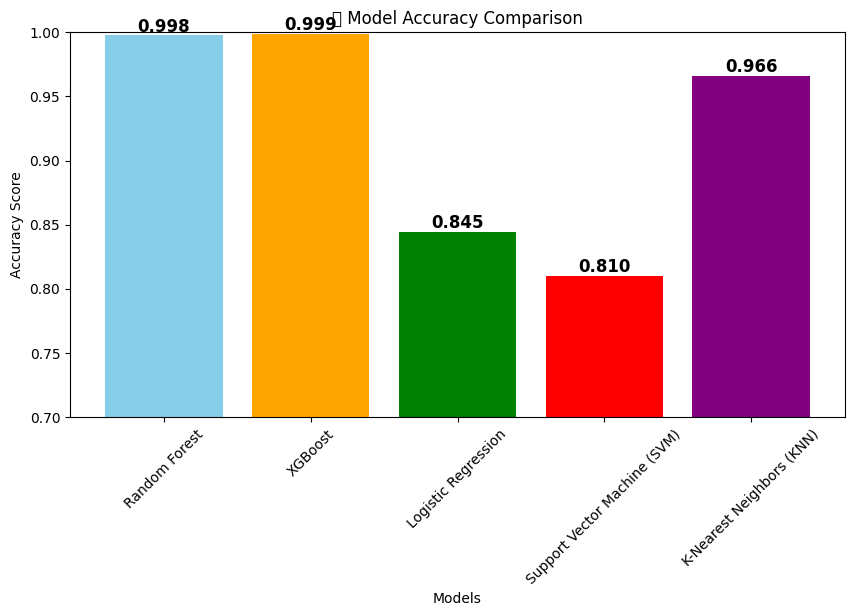

In [ ]:
# Extract model names and accuracies
model_names = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

# Plot model accuracies
plt.figure(figsize=(10, 5))
bars = plt.bar(model_names, accuracies, color=['skyblue', 'orange', 'green', 'red', 'purple'])

# Add accuracy values on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{bar.get_height():.3f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("📊 Model Accuracy Comparison")
plt.ylim(0.7, 1.0)  # Set y-axis limit for better visualization
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grids for Random Forest and XGBoost
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 1.0],
}

# Perform GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                              param_grid=rf_param_grid,
                              cv=5,
                              scoring='accuracy',
                              verbose=2,
                              n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Perform GridSearchCV for XGBoost
xgb_grid_search = GridSearchCV(estimator=XGBClassifier(),
                               param_grid=xgb_param_grid,
                               cv=5,
                               scoring='accuracy',
                               verbose=2,
                               n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

# Display best parameters and scores for each model
print("Best parameters for Random Forest: ", rf_grid_search.best_params_)
print("Best score for Random Forest: ", rf_grid_search.best_score_)

print("Best parameters for XGBoost: ", xgb_grid_search.best_params_)
print("Best score for XGBoost: ", xgb_grid_search.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Random Forest:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score for Random Forest:  0.99725
Best parameters for XGBoost:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best score for XGBoost:  0.999375


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Use the best models
best_rf_model = rf_grid_search.best_estimator_
best_xgb_model = xgb_grid_search.best_estimator_

# Predict on test data
rf_y_pred = best_rf_model.predict(X_test)
xgb_y_pred = best_xgb_model.predict(X_test)

# Evaluate Random Forest
print("📊 Random Forest Performance:")
print(confusion_matrix(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))
print(f"Accuracy: {accuracy_score(y_test, rf_y_pred):.4f}")

# Evaluate XGBoost
print("\n📊 XGBoost Performance:")
print(confusion_matrix(y_test, xgb_y_pred))
print(classification_report(y_test, xgb_y_pred))
print(f"Accuracy: {accuracy_score(y_test, xgb_y_pred):.4f}")


📊 Random Forest Performance:
[[ 496    0    2]
 [   0  285    0]
 [   0    6 1211]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       498
           1       0.98      1.00      0.99       285
           2       1.00      1.00      1.00      1217

    accuracy                           1.00      2000
   macro avg       0.99      1.00      0.99      2000
weighted avg       1.00      1.00      1.00      2000

Accuracy: 0.9960

📊 XGBoost Performance:
[[ 497    0    1]
 [   0  285    0]
 [   0    3 1214]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       498
           1       0.99      1.00      0.99       285
           2       1.00      1.00      1.00      1217

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Accuracy: 0.9980


In [ ]:
import joblib

# Save the XGBoost model
joblib.dump(best_xgb_model, 'best_sleep_model.pkl')
print("✅ Best XGBoost model saved as 'best_sleep_model.pkl'")


✅ Best XGBoost model saved as 'best_sleep_model.pkl'


In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import joblib
from xgboost import XGBClassifier

# Load the trained XGBoost model
model = joblib.load("/content/best_sleep_model.pkl")

# Define feature names expected by the model
feature_names = ['Age', 'Sleep_Duration', 'Study_Hours', 'Screen_Time', 'Caffeine_Intake',
 'Physical_Activity', 'Weekday_Sleep_Duration', 'Weekend_Sleep_Duration',
 'Sleep_Duration_Diff', 'Sleep_Start_Diff', 'Sleep_End_Diff']


# Function to calculate additional features
def calculate_features(data):
    # Calculate weekday and weekend sleep duration
    data['Weekday_Sleep_Duration'] =  abs(data['Weekday_Sleep_End'] - data['Weekday_Sleep_Start'])
    data['Weekend_Sleep_Duration'] = abs(data['Weekend_Sleep_End'] - data['Weekend_Sleep_Start'])

    # Calculate sleep duration difference
    data['Sleep_Duration_Diff'] = abs(data['Weekend_Sleep_Duration'] - data['Weekday_Sleep_Duration'])

    # Calculate sleep start and end differences
    data['Sleep_Start_Diff'] = abs(data['Weekend_Sleep_Start'] - data['Weekday_Sleep_Start'])
    data['Sleep_End_Diff'] = abs((data['Weekend_Sleep_End'] - data['Weekday_Sleep_End']))

    return data


# Function to get user inputs
def get_user_input():
    data = {
    'Age': int(input("Enter Age: ")),
    'Sleep_Duration': float(input("Enter Sleep Duration (hours): ")),
    'Study_Hours': float(input("Enter Study Hours: ")),
    'Screen_Time': float(input("Enter Screen Time (hours/day): ")),
    'Caffeine_Intake': float(input("Enter Caffeine Intake (cups/day): ")),
    'Physical_Activity': float(input("Enter Physical Activity Level (in minutes): ")),
    'Weekday_Sleep_Start': float(input("Enter Weekday Sleep Start Time (24-hour format): ")),
    'Weekday_Sleep_End': float(input("Enter Weekday Sleep End Time (24-hour format): ")),
    'Weekend_Sleep_Start': float(input("Enter Weekend Sleep Start Time (24-hour format): ")),
    'Weekend_Sleep_End': float(input("Enter Weekend Sleep End Time (24-hour format): "))
}


    # Convert to DataFrame
    data_df = pd.DataFrame([data])

    # Calculate additional features
    data_df = calculate_features(data_df)

    return data_df


# Get user input and calculate additional features
user_input = get_user_input()

# Make prediction using the trained XGBoost model
def predict_sleep_quality(input_data):
    # Select required features to match model input
    input_data = input_data[feature_names]

    # Print user inputs for debugging
    print(f"\n✅ Input Data for Prediction:\n{input_data}\n")


    prediction = model.predict(input_data)

    # Correct class labels
    sleep_labels = {
        0: "Poor Sleep",
        1: "Healthy Sleep",
        2: "Unhealthy Sleep"
    }

    # Get predicted label
    predicted_label = sleep_labels[prediction[0]]
    return predicted_label


# Get prediction
predicted_quality = predict_sleep_quality(user_input)

# Display result
print(f"\n🛏️ Predicted Sleep Quality: {predicted_quality}")


Enter Age: 20
Enter Sleep Duration (hours): 8
Enter Study Hours: 4
Enter Screen Time (hours/day): 3
Enter Caffeine Intake (cups/day): 2
Enter Physical Activity Level (in minutes): 20
Enter Weekday Sleep Start Time (24-hour format): 22
Enter Weekday Sleep End Time (24-hour format): 5
Enter Weekend Sleep Start Time (24-hour format): 23
Enter Weekend Sleep End Time (24-hour format): 7

✅ Input Data for Prediction:
   Age  Sleep_Duration  Study_Hours  Screen_Time  Caffeine_Intake  \
0   20             8.0          4.0          3.0              2.0   

   Physical_Activity  Weekday_Sleep_Duration  Weekend_Sleep_Duration  \
0               20.0                    17.0                    16.0   

   Sleep_Duration_Diff  Sleep_Start_Diff  Sleep_End_Diff  
0                  1.0               1.0             2.0  


🛏️ Predicted Sleep Quality: Healthy Sleep
